In [50]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from skompiler import skompile

In [64]:
veri_seti = pd.read_excel('HW_Data_Set.xlsx')
df = veri_seti.copy()
df.head(5)

ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target  
0  0.701906  15.135802  35.625252  36.997753  
1  0.690833  15.143348  35.643013  37.016198  
2  0.693040  15.146870  35.651301 -37.024805  
3  0.673418  15.153283   0.000000 -37.040483  
4  0.700522 -15.179065 -35.727079 -37.103503  

[5 rows x 136 columns]

In [65]:
df['ind_420'] = pd.to_numeric(df['ind_420'], errors='coerce')
df['ind_422'] = pd.to_numeric(df['ind_422'], errors='coerce')

In [66]:
df["ind_422"].fillna(df["ind_422"].median(), inplace=True)
df["ind_420"].fillna(df["ind_420"].median(), inplace=True)

In [67]:
df.dropna(inplace = True)

In [68]:
df_dummies = pd.get_dummies(df)

# DecisionTree

In [9]:
X = df_dummies.drop(["20_target","50_target","90_target"], axis = 1)
y = df_dummies["50_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
cart = DecisionTreeRegressor()

In [12]:
cart_model = cart.fit(X_train, y_train)

In [13]:
y_pred = cart_model.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test, y_pred))

21.8732134094688

In [17]:
r2_score(y_test, y_pred)

0.601440036190388

In [ ]:
print(skompile(cart_model.predict).to("python/code"))

In [18]:
cart

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
cart_params = { "max_depth": [2, 3, 4, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55, 60, 75, 90, 100],
                "min_samples_leaf": [2, 3, 4, 5, 10, 15, 20, 30, 40, 45, 60, 70, 80, 100],
                "min_samples_split": [2, 3, 4, 5, 10, 15, 20, 30, 40, 45, 60, 70, 80, 100, 200, 400, 800, 1500, 2000],
              }

In [25]:
cart_cv = GridSearchCV(cart, cart_params, cv=10, n_jobs= -1, verbose=2)

In [26]:
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 4522 candidates, totalling 45220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1974 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 2864 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3918 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5132 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6510 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 8048 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 9750 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 11612 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 13638 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 15824 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 18174 tasks   

In [27]:
cart_cv_model.best_params_

{'max_depth': 55, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [28]:
cart_tuned = DecisionTreeRegressor(max_depth= 55, min_samples_leaf= 2, min_samples_split= 3)

In [29]:
cart_tuned_model = cart_tuned.fit(X_train,y_train)

In [31]:
y_pred_tuned = cart_tuned_model.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

21.253724129942487

In [35]:
r2_score(y_test, y_pred_tuned)

0.6236962305488962

In [108]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)

tree.plot_tree(cart_tuned,
           filled = True);

fig.savefig('imagename.png')

# RandomForest

In [94]:
X = df_dummies.drop(["20_target","50_target","90_target"], axis = 1)
y = df_dummies["50_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [95]:
rf = RandomForestRegressor()

In [97]:
rf_model = rf.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

47.05421834720249

In [99]:
r2_score(y_test, y_pred)

-0.8468736229347915

In [100]:
rf_params = {   "n_estimators": [100, 150],
                 
                "max_depth": [2, 3, 4, 5, 10, 20],
                "min_samples_leaf": [2, 3, 4,],
                "min_samples_split": [2, 3, 5]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs= -1, verbose = 2)

In [ ]:
rf_cv_model.fit(X_train, y_train)

In [ ]:
rf_cv_model.best_params_

In [101]:
rf_tuned = RandomForestRegressor(max_depth= 20,
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 150)

In [102]:
rf_model_tuned = rf_tuned.fit(X_train, y_train)

In [103]:
y_pred_tuned = rf_model_tuned.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

13.785453205526615

In [105]:
r2_score(y_test, y_pred_tuned)

0.8414806989840367

In [106]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

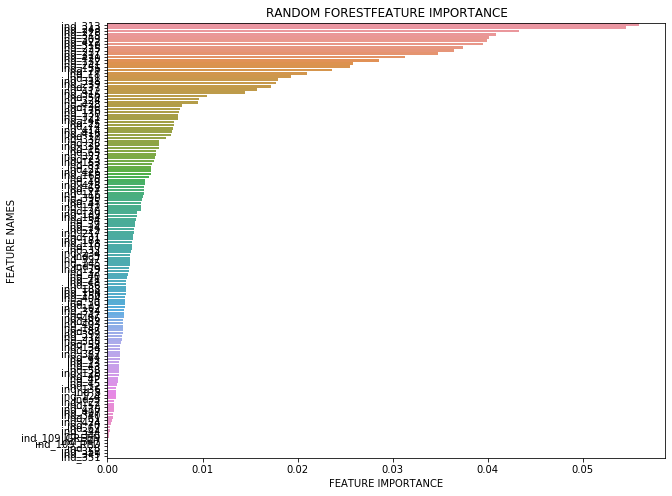

In [107]:
plot_feature_importance(rf_tuned.feature_importances_, X_train.columns,'RANDOM FOREST')

# Neural network

In [69]:
X = df_dummies.drop(["20_target","50_target","90_target"], axis = 1)
y = df_dummies["50_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [70]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 20))

In [71]:
mlp_model = mlp.fit(X_train, y_train)

In [72]:
y_pred = mlp_model.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.025381999250435

In [74]:
r2_score(y_test, y_pred)

0.5534156850890979

In [75]:
mlp

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [76]:
mlp_params = { "alpha": [0.1, 0.01, 0.02, 0.005],
             "hidden_layer_sizes": [(20, 20), (100, 50, 150), (300, 200, 150), (100, 20)],
             "activation": ["relu", "logistic"],
             "solver" : ['lbfgs', 'sgd', 'adam']}

In [77]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
mlp_cv_model.fit(X_train, y_train)